# Basic Plotting
Adapted from *COMP 5369 / MATH 4100, University of Utah, http://datasciencecourse.net/*

To be frank: the Python data visualization environment is a MESS. It remindes me of this: 


![](standards.png)

### Matplotlib & Extensions

 * [Matplotlib](https://matplotlib.org/) - the elephant in the room
 * [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) - based on Matplotlib
 * [Seaborn](https://seaborn.pydata.org/) - based on Matplotlib, higher-level
 * [ggplot](http://ggplot.yhathq.com/) - based on the popular R plotting library, some similarites, uses Matplotlib.
 
These tools generally can be used to create figures independent of Jupyter. 
 
### Web-based Vis tools

 * [Bokeh](https://bokeh.pydata.org/en/latest/)
 * [Plotly](https://plot.ly/python/)
 * [Altair](https://github.com/altair-viz/altair), based on [Vega](https://vega.github.io/vega/) 
 * [PdVega](https://jakevdp.github.io/pdvega/), based on Vega, integrated with pandas dataframes.
 
These tools mostly rely on Jupyter running in your browser and use a JavaScript based language in the backend. 

There are also some domain specific libraries, e.g., for maps and for networks, that we will cover at a later point. 
 
 
There are also [many](https://www.dataquest.io/blog/python-data-visualization-libraries/) [blog](https://codeburst.io/overview-of-python-data-visualization-tools-e32e1f716d10) [posts](https://lisacharlotterost.github.io/2016/05/17/one-chart-code/) [comparing](https://blog.modeanalytics.com/python-data-visualization-libraries/) various data visualization libraries.

Generally speaking, there are plotting libraries that have pre-made charts, and drawing libraries that allow you to freely express anything you can imagine. We will mainly cover the former, but as visualization reseaerchers we typically rely on tools that enable arbitrary expressivity, such as [D3](https://d3js.org/) or [WebGL](https://developer.mozilla.org/en-US/docs/Web/API/WebGL_API).

We will start of with basic Matplotlib, explore the build-in pandas library, and then look at some more advanced tools.

## Matplotlib

Matplotlib is a project started in 2002 and is inspired by MATLAB plotting. Matlab is a programming language/environment for doing numerical manipulation/analysis.  It's very powerful, but expensive, and a lot of the functionality is availble in open source software (numpy/scipy/matplotlib, the R language, etc)

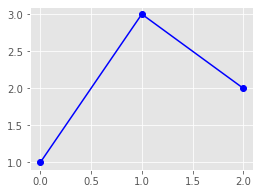

In [3]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

# remember, code after a % is ipython specific instructions
# this command tells Jupyter/ipython that we want to create the visualizations
# inline in this notebook instead of as files to save.
# %matplotlib inline
# it might not actually be necessary...

# Some "styling"
_ = plt.figure(figsize=(4, 3))
plt.style.use('ggplot')

# Here we run a simple plot command to create a line chart
# Note, if only 1D data, they become the Y values, and the index becomes the X value.
plt.plot([1, 3, 2], "bo-")

The `.plot` command uses a figure to plot in. If no figure has been defined, it will automatically create one. If there is already a figure, it will plot to the latest figure. 

Here we create a figure manually: 

In [4]:
# we create a figure with size 10 by 10 inches
fig = plt.figure( figsize=(10, 10) )

<Figure size 720x720 with 0 Axes>

The figure by itself doesn't plot anyhing. We have to add a subplot to it. 

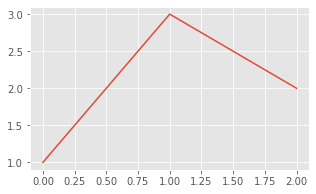

In [5]:
# figsize defines the size of the plot in inches - 10 wide by 8 high here. 
fig = plt.figure(figsize=(5, 3))
# add a suplot to an grid 1x1, return the 1st figure
my_plot = fig.add_subplot( 1, 1, 1 )
my_plot.plot( [1, 3, 2] )

Here we add a title and axis labels: 

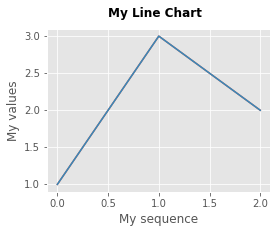

In [6]:
fig = plt.figure( figsize=(4, 3) )
my_plot = fig.add_subplot( 1, 1, 1 )
my_plot.plot( [ 1, 3, 2 ] )
fig.suptitle( 'My Line Chart', fontsize=12, fontweight='bold' )

my_plot.set_xlabel( "My sequence" )
my_plot.set_ylabel( "My values" )
my_plot.plot( [1, 3, 2] )

Now let's create a figure with multiple subplots:

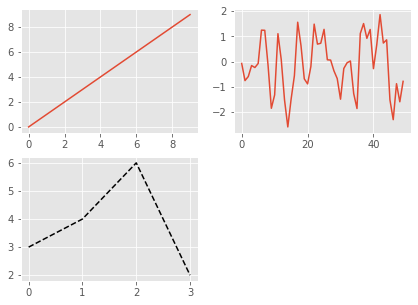

In [7]:
fig = plt.figure(figsize=(7, 5))
# create a subplot in a 2 by 2 grid, return the subplot at position 1
# these subplots are often called "axes"
sub_fig_1 = fig.add_subplot( 2,2,1 ) # 1-based counting
sub_fig_2 = fig.add_subplot( 2,2,2 )
sub_fig_3 = fig.add_subplot( 2,2,3 )

# This will plot to the last figure used, k-- is a style option for black dashed
# You shouldn't do this - rather use explicit subplot references if you have them
plt.plot( [3, 4, 6, 2], "k--" )

# Here I can plot explicitly to a figure:
sub_fig_1.plot( range(0,10) )

sub_fig_2.plot( np.random.randn(50).cumsum() )

We can use the `subplots` shorthand to create multiple subplots that we can access form an array. 

We're also trying out a couple of different visualziation techniques: 

 * [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)  
 * [Vertical Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
 * [Horizontal Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)
 * [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)
 * [Pie Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)

# Bookmark this one

<Figure size 720x720 with 0 Axes>

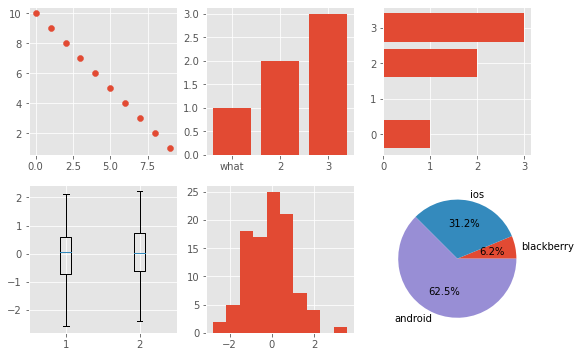

In [8]:
def sample_figures():
    fig, subfigs = plt.subplots(2, 3, figsize=(9, 6))

    # pass two arrays in the same order
    subfigs[0,0].scatter(range(0,10),range(10,0,-1))
    # first array is index, second is data
    subfigs[0,1].bar(["what", "2", "3"], [1, 2, 3])
    subfigs[0,2].barh([0, 2, 3], [1, 2, 3])
    # we create two box plots
    subfigs[1,0].boxplot([np.random.randn(200), np.random.randn(200)] )
    # histogram takes one array
    subfigs[1,1].hist(np.random.randn(100))
    
    subfigs[1,2].pie([1, 5, 10], labels=["blackberry", "ios", "android"], autopct='%1.1f%%')

fig = plt.figure(figsize=(10, 10))
sample_figures()

### Heat Maps

Heat maps encoded matrix/tabular data using color. There are two ways to implement heatmaps in Matplotlib:

 * [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

imshow is used to display images (which are just matrices). In practice, imshow and pcolor differ mainly in their coordinate system: the origin of imshow is at the top left (as is common for images), the origin of pcolor is at the bottom left.

For heatmaps, we need a [color map](https://matplotlib.org/tutorials/colors/colormaps.html). Matplotlib has many color maps baked in, also those from http://colorbrewer.org.

In [9]:
def gkern( l=5, sig=1. ):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.arange( -l // 2 + 1., l // 2 + 1. )
    xx, yy = np.meshgrid( ax, ax )
    kernel = np.exp( -(xx**2 + yy**2) / (2. * sig**2) )
    return kernel / np.sum( kernel )

kernel = gkern( 20, 5 )

print( kernel.shape )


(20, 20)


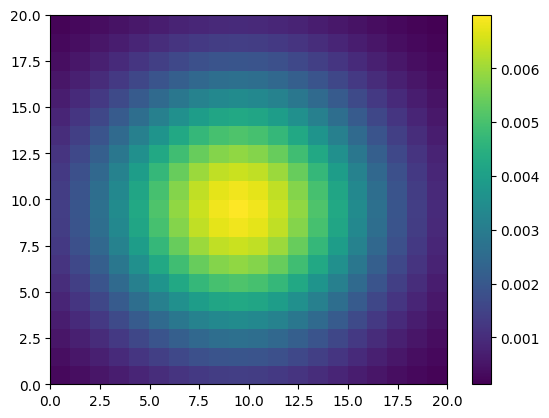

In [10]:
plt.style.use( 'default' )
# select a blue color map
heatmap = plt.pcolor( kernel )#, cmap=plt.cm.Blues )
# plot the legend on the side
plt.colorbar( heatmap )


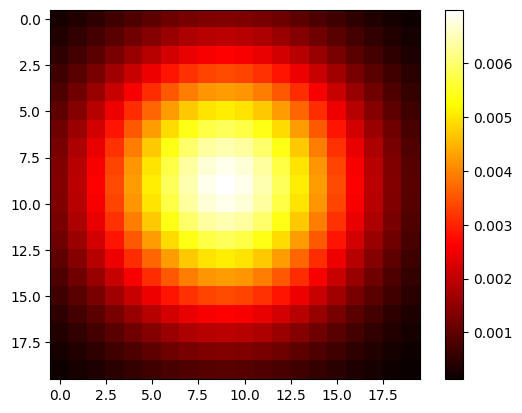

In [11]:
hm = plt.imshow( kernel, cmap='hot' )
plt.colorbar( hm )

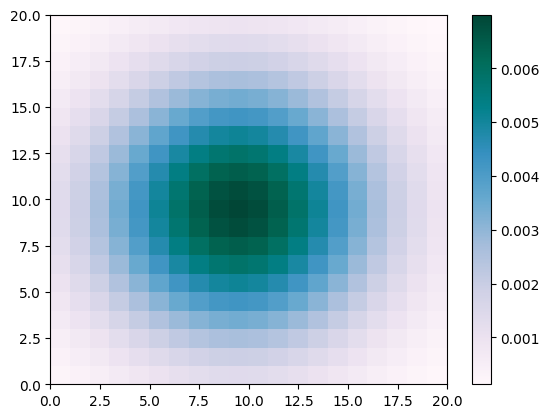

In [12]:
# a diverging color map from Color Brewer
heatmap = plt.pcolor( kernel, cmap=plt.cm.PuBuGn )
plt.colorbar( heatmap )

### Styling

Matplotlib has [different styles](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html) that we can apply globally.

Here are a couple of examples:

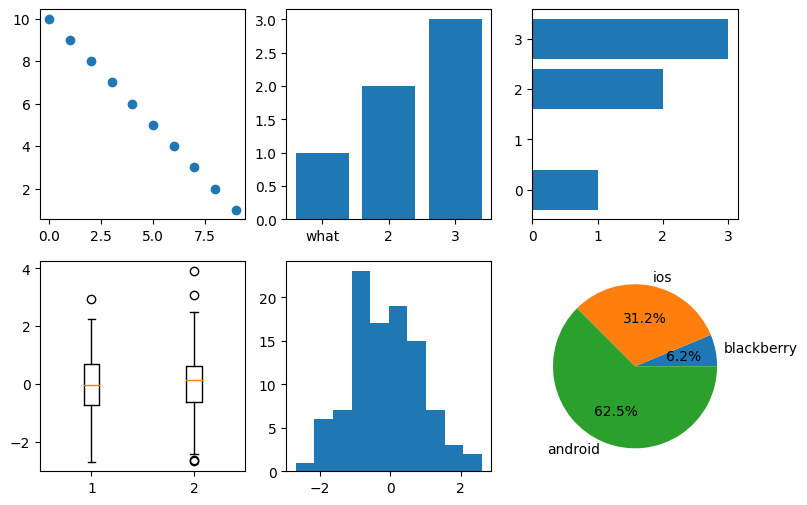

In [13]:
plt.style.use( 'default' )
sample_figures()

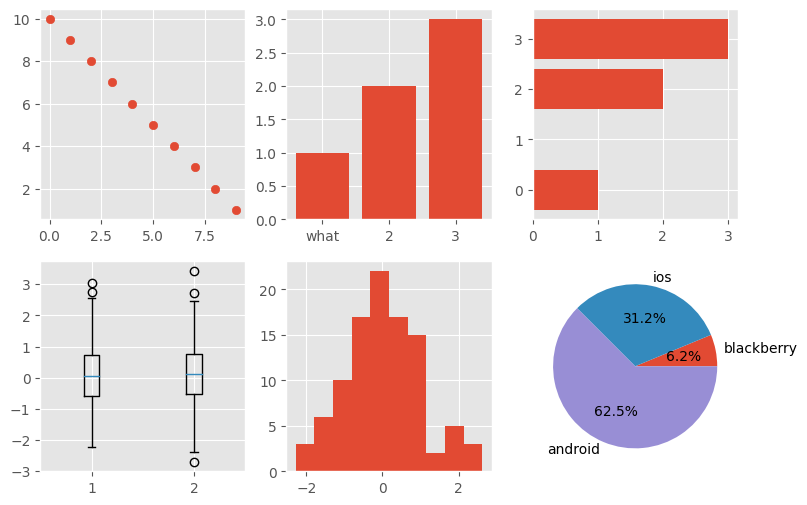

In [14]:
plt.style.use( 'ggplot' )
sample_figures()

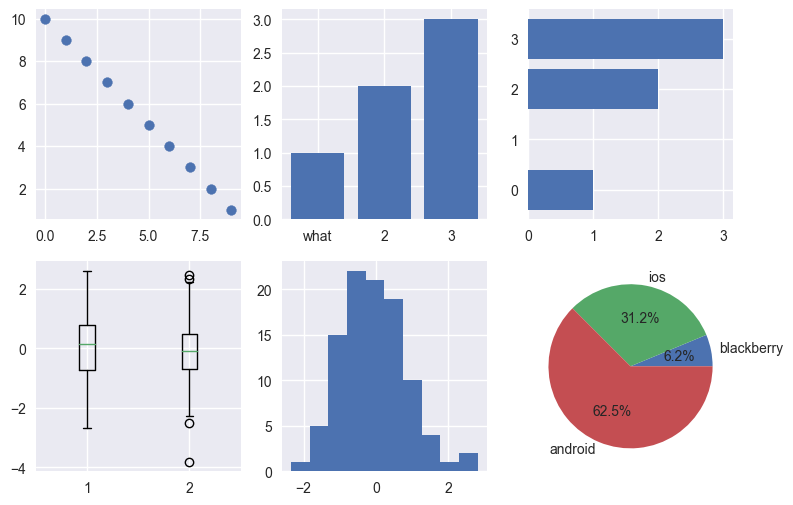

In [15]:
plt.style.use('seaborn')
sample_figures()

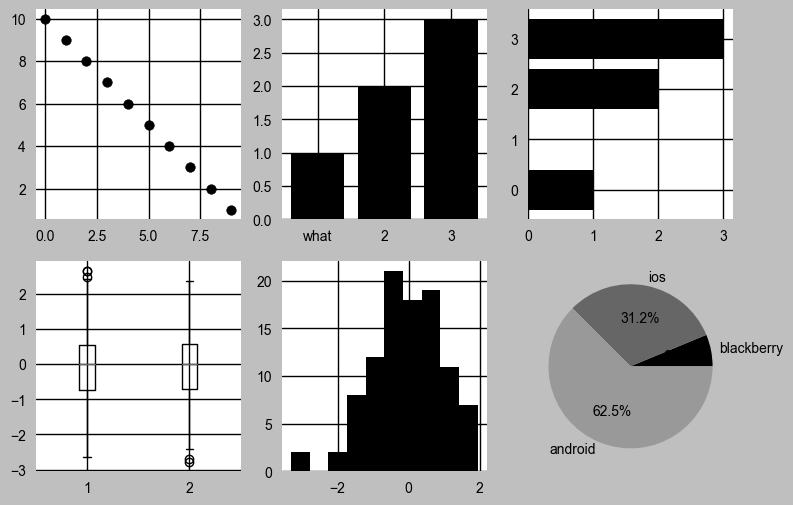

In [16]:
plt.style.use('grayscale')
sample_figures()

## Plotting with Pandas

Pandas has good [built-in plotting capabilities](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). We've seen some already in previous lectures. 

In [22]:
plt.style.use( 'ggplot' )
pd_movies = pd.read_csv( 'movies.csv' )
# pd_movies[ "Drama" ] = pd_movies["Drama"].astype( 'bool' )
pd_movies.head()
# pd_movies.describe()
# pd_movies.columns

FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'

### Line Chart

In [2]:
major_movies = pd_movies[ pd_movies[ 'votes' ] >= 500 ]

print( "Number of movies:", pd_movies.shape[0] )

# display( major_movies[ "year" ].sort_values() )

yearly_movies = major_movies[ "year" ].value_counts().sort_index()
#yearly_movies

NameError: name 'pd_movies' is not defined

In [ ]:
yearly_movies.plot()

### Histogram

In [ ]:
_ = major_movies.hist( "rating", alpha=0.7 ) # bins=79
# major_movies["rating"].describe()

In [ ]:
#you can also pass a series to matplotlib functions, but if you can use pandas stuff,
#do so, since it can keep more context info and can make some stuff easier
plt.hist( major_movies["rating"] )

### Bar Chart

We'll show a bar chart for the first 10 movies

In [21]:
subset = major_movies.set_index( "title" )
subset = subset.iloc[ 0:10 ]
subset

NameError: name 'major_movies' is not defined

In [ ]:
_ = subset[ "rating" ].plot( kind="bar" )

In [ ]:
subset[["r1", "r2", "r3"]].plot( kind="barh" )

In [ ]:
subset[["r1", "r2", "r3"]].plot(kind="barh", stacked=True)

### Scatterplot

We can plot a scatterplot, comparing ratings of movies over time:

In [20]:
# plt.figure( figsize=(2, 2) )
_ = major_movies.plot.scatter( "year", "rating", figsize=(12, 6) )

NameError: name 'major_movies' is not defined

However, here we might overplot some points in more recent years. We can fix that with an alpha value:

In [19]:
major_movies.plot.scatter("year", "rating", figsize=(15, 10), alpha=0.4)

NameError: name 'major_movies' is not defined

### Box Plot

Let's plot a box plot of the ratings

In [18]:
plt.style.use('ggplot')
major_movies[["length"]].plot(kind="box") # , showfliers=False)

NameError: name 'major_movies' is not defined

Obviously, these outliers are dominating the scale. If we want to remove these extreme outliers, we can do that:

In [ ]:
#mask = major_movies[["r1", "r2", "r3", "r4"]]>10
length = major_movies[["length"]]
length = length.where(length < 150, None)

In [ ]:
length.plot(kind="box")

## Set Visualization


We van draw an area-proportional Venn Diagram using [Matplotlib-Venn](https://pypi.python.org/pypi/matplotlib-venn) 

This is a custom package, so we have to install it: 

```
$/usr/local/bin/pip3 install matplotlib-venn
```

In [ ]:
from matplotlib_venn import venn3
venn3(subsets = (4, 1, 1, 2, 1, 2, 2), set_labels = ('Set1', 'Set2', 'Set3'))

Let's create a venn diagram with the genres from our movie dataset. 

In [ ]:
# Here we extract the sets
def extract_sets(data_frame, set_labels):
    data_dict = {};
    for set_label in set_labels:
        subset = data_frame[data_frame[set_label] == 1]
        data_dict[set_label] = subset["title"];
    return data_dict

data_dict = extract_sets(major_movies,["Action", "Drama", "Comedy", "Documentary", "Romance"])

In [ ]:
action = set(data_dict["Action"].tolist())
drama = set(data_dict["Drama"].tolist())
comedy = set(data_dict["Comedy"].tolist())
venn3([action, drama, comedy], ("Action", "Drama", "Comedy"))